In [1]:
!apt-get install graphviz -y

패키지 목록을 읽는 중입니다... 완료%
의존성 트리를 만드는 중입니다       
상태 정보를 읽는 중입니다... 완료
패키지 graphviz는 이미 최신 버전입니다 (2.40.1-2).
0개 업그레이드, 0개 새로 설치, 0개 제거, 0개 업그레이드 안 함.
W: Target Packages (main/binary-amd64/Packages) is configured multiple times in /etc/apt/sources.list.d/google-chrome.list:3 and /etc/apt/sources.list.d/google.list:1
W: Target Packages (main/binary-all/Packages) is configured multiple times in /etc/apt/sources.list.d/google-chrome.list:3 and /etc/apt/sources.list.d/google.list:1


In [2]:
!pip install graphviz

In [54]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import graphviz

# 머신러닝
from sklearn import datasets, svm, neighbors, tree
from sklearn.model_selection import cross_val_score

# 가상의 데이터 생성
- 그림을 그리기 위해서 이렇게 합니다. 
- 실제 데이터들은 입력데이터의 차원이 높다(변수가 많다는 뜻)
    - 그림을 그릴 수 없다. 

## 분류 데이터

In [3]:
# xy, labels = datasets.make_blobs(n_samples=50, n_class, random_state=123)
xy, xy_labels = datasets.make_classification(
    n_samples=50, n_features=2, n_informative=1, n_redundant=0, 
    n_clusters_per_class=1, n_classes=2, random_state=123
)

xyz, xyz_labels = datasets.make_classification(
    n_samples=50, n_features=2, n_informative=2, n_redundant=0, 
    n_clusters_per_class=1, n_classes=3, random_state=1234
)

In [3]:
xyz.shape

(50, 2)

In [4]:
xyz_labels[:10]

array([0, 0, 2, 2, 2, 1, 0, 0, 0, 2])

- 입력차원이 2임을 가정한 데이터로 ($x_1, x_2$) 정도로 생각
- 레이블이 2(binary classification)인 데이터와 레이블이 3(multi classifiaction)인 데이터

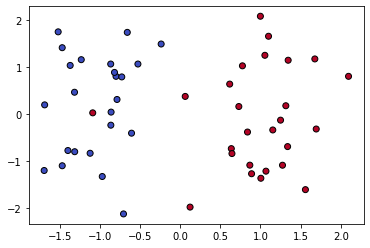

In [5]:
plt.scatter(xy[:,0], xy[:,1], cmap='coolwarm', edgecolors='k', c=xy_labels)
plt.show()

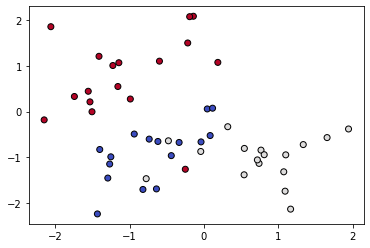

In [4]:
plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.show()

## 회귀 데이터

In [16]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(50, 1), axis=0)
Y = np.cos(np.pi * X).flatten() + np.sin(np.pi * X).flatten() + np.random.rand(len(X))
newX = np.linspace(0, 5, 1000).reshape(1000, 1) # 회귀선을 그리는 용도

In [17]:
print(X.shape, Y.shape, newX.shape)

(50, 1) (50,) (1000, 1)


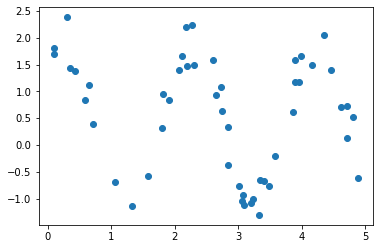

In [18]:
plt.plot(X, Y, 'o')
plt.show()

# SVM(Support Vector Machine)

## SVC(Support Vsctor Classification)

In [13]:
# model = svm.SVC(kernel='rbf', C=1000).fit(xy, xy_labels)
model = svm.SVC(kernel='rbf', C=1, gamma='scale').fit(xyz, xyz_labels)

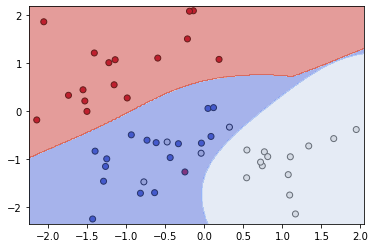

In [14]:
xx, yy = np.meshgrid(
#     np.arange(xy[:,0].min() - 0.1, xy[:,0].max() + 0.1, 0.01), 
#     np.arange(xy[:,1].min() - 0.1 , xy[:,1].max() + 0.1 , 0.01)
    np.arange(xyz[:,0].min() - 0.1, xyz[:,0].max() + 0.1, 0.01), 
    np.arange(xyz[:,1].min() - 0.1, xyz[:,1].max() + 0.1 , 0.01)
)

yhat = model.predict(np.c_[xx.flatten(), yy.flatten()])

# plt.scatter(xy[:,0], xy[:,1], cmap='coolwarm', edgecolors='k', c=xy_labels)
plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.contourf(xx, yy, yhat.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
plt.show()

### 파라미터 추정하기

In [9]:
sets = [x for x in range(1, 1000)]
scores = []

for c in sets:
    # k값을 바꾸면서 모형을 적합
    svc = svm.SVC(kernel='rbf', C=c, gamma='auto').fit(xyz, xyz_labels)
    # 만들어진 모형에서 CV 스코어를 계산
#     score = cross_val_score(knn, xy, xy_labels, cv=10, scoring='accuracy') 
    score = cross_val_score(svc, xyz, xyz_labels, cv=10, scoring='accuracy') 
    # 10개의 교차검증 셋의 평균 점수
    scores.append(score.mean())

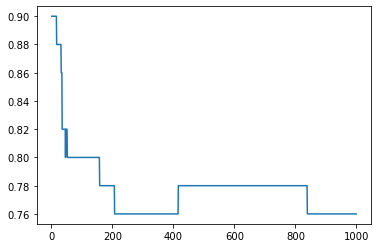

In [10]:
plt.plot(sets, scores)
plt.show()

In [11]:
np.max(scores)

0.9000000000000001

In [12]:
np.argmax(scores)

0

In [16]:
sets[0]

1

## SVR(Support Vector Regressor)

In [19]:
model = svm.SVR(kernel='rbf', C=100, gamma=0.5).fit(X,Y)

In [20]:
yhat = model.predict(newX)

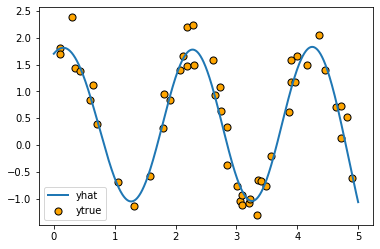

In [21]:
plt.scatter(X, Y, s=50, edgecolors='black', c='orange', label='ytrue')
plt.plot(newX, yhat, label='yhat', linewidth=2)
plt.legend()
plt.show()

# KNN(K-Nearst Neighbor)
- K - 최근접 이웃
- k가 너무 작으면 과적합이 될 우려
- k가 너무 크면 분류를 하는 의미가 없어진다(과소적합이 될 우려)

## classification

In [29]:
# model = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance').fit(xy, xy_labels)
model = neighbors.KNeighborsClassifier(n_neighbors=16, weights='distance').fit(xyz, xyz_labels)

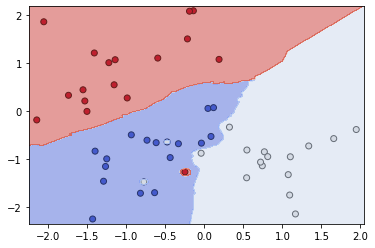

In [30]:
xx, yy = np.meshgrid(
#     np.arange(xy[:,0].min() - 0.1, xy[:,0].max() + 0.1, 0.01), 
#     np.arange(xy[:,1].min() - 0.1 , xy[:,1].max() + 0.1 , 0.01)
    np.arange(xyz[:,0].min() - 0.1, xyz[:,0].max() + 0.1, 0.01), 
    np.arange(xyz[:,1].min() - 0.1, xyz[:,1].max() + 0.1 , 0.01)
)

yhat = model.predict(np.c_[xx.flatten(), yy.flatten()])

# plt.scatter(xy[:,0], xy[:,1], cmap='coolwarm', edgecolors='k', c=xy_labels)
plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.contourf(xx, yy, yhat.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
plt.show()

### 최적의 k값 찾기
- Cross Validation을 통한 k값 찾기

In [25]:
kset = [x for x in range(1, 40)]
kscore = []

for k in kset:
    # k값을 바꾸면서 모형을 적합
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance') 
    # 만들어진 모형에서 CV 스코어를 계산
#     score = cross_val_score(knn, xy, xy_labels, cv=10, scoring='accuracy') 
    score = cross_val_score(knn, xyz, xyz_labels, cv=10, scoring='accuracy') 
    kscore.append(score.mean())

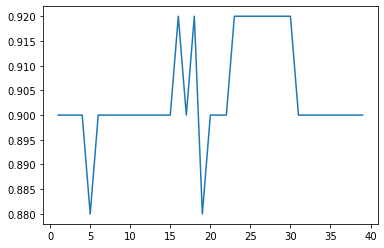

In [26]:
plt.plot(kset, kscore)
plt.show()

In [27]:
np.max(kscore)

0.9200000000000002

In [28]:
np.argmax(kscore)

15

## Regression

In [40]:
model = neighbors.KNeighborsRegressor(n_neighbors=2, weights='uniform').fit(X, Y)

In [41]:
yhat = model.predict(newX)

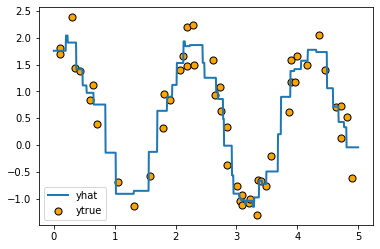

In [42]:
plt.scatter(X, Y, s=50, edgecolors='black', c='orange', label='ytrue')
plt.plot(newX, yhat, label='yhat', linewidth=2)
plt.legend()
plt.show()

# Decision Tree
- 결정트리

## Decision Tree Classification

In [59]:
# model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2).fit(xyz, xyz_labels)
model = tree.DecisionTreeClassifier(criterion='gini').fit(xyz, xyz_labels)

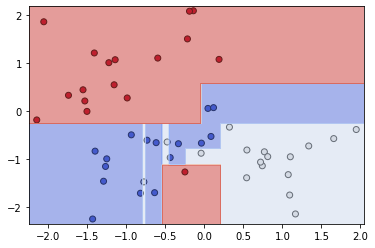

In [60]:
xx, yy = np.meshgrid(
    np.arange(xyz[:,0].min() - 0.1, xyz[:,0].max() + 0.1, 0.01), 
    np.arange(xyz[:,1].min() - 0.1, xyz[:,1].max() + 0.1 , 0.01)
)

yhat = model.predict(np.c_[xx.flatten(), yy.flatten()])

plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.contourf(xx, yy, yhat.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
plt.show()

In [45]:
dot_data=tree.export_graphviz( 
    model, out_file=None,
    filled=True, rounded=True,
    special_characters=True
)
graph=graphviz.Source(dot_data)

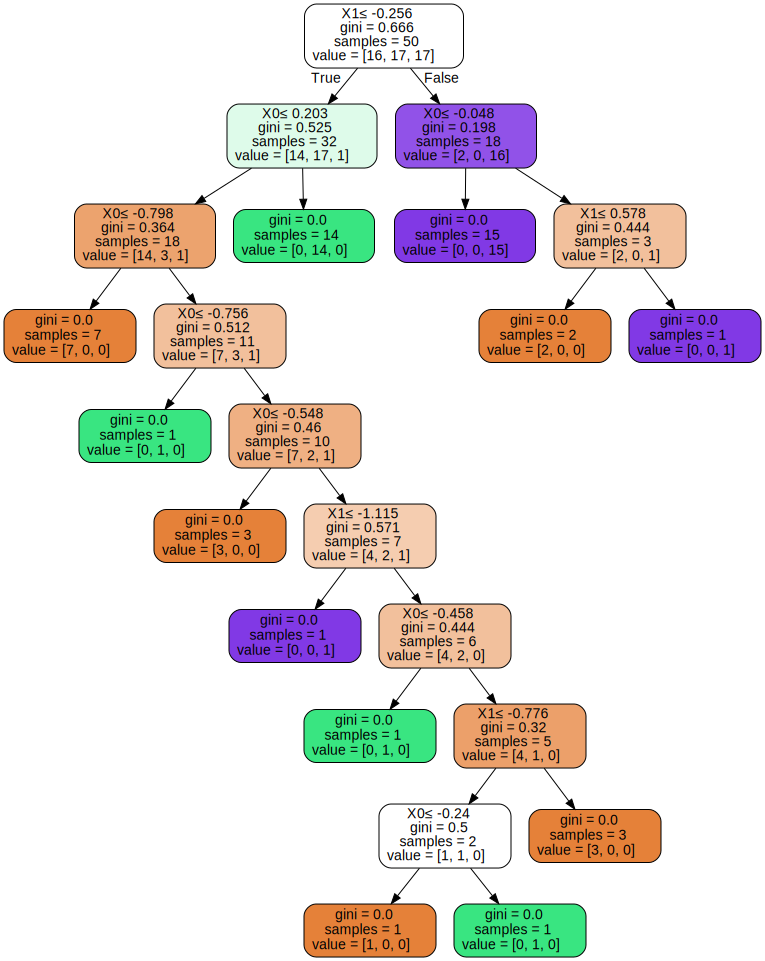

In [46]:
graph

## Decision Tree Regression

In [51]:
model = tree.DecisionTreeRegressor(max_depth=5).fit(X, Y)
# model = tree.DecisionTreeRegressor().fit(X, Y)

In [52]:
yhat = model.predict(newX)

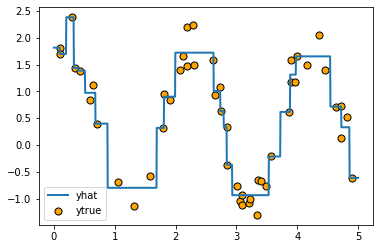

In [53]:
plt.scatter(X, Y, s=50, edgecolors='black', c='orange', label='ytrue')
plt.plot(newX, yhat, label='yhat', linewidth=2)
plt.legend()
plt.show()